In [1]:
import numpy as np
from numpy import pi as pi

import re 

import matplotlib.pyplot as plt
from matplotlib import tri as tri

In [2]:
def lorentzian(nu, nu0, Gamma):
    return 1/pi*(Gamma/2)**2/((nu-nu0)**2 + (Gamma/2)**2)

def spectral_coupling_density(nu, e, E_el, d=1.3e15, f=1.7e15/2, T=5):
    h = 6.626e-34
    kB = 1.38e-23
    return h*nu/2*1/E_el*((d*(e[0,0]-e[1,1])+f*e[0,2])**2 + (-2*d*e[0,1]+f*e[1,2])**2)*1/np.tanh(h*nu/(2*kB*T))


In [58]:
ms = []
nu0s = []
imags = []
Qs = []

M = 5
with open('Data\Electron-Phonon-Engineering\Eigenfrequencies_Energies_Qs.txt') as f:
    lines = f.readlines()
    data = np.array([el.replace('i','j') for el in lines[-1].split()])
    data = data.reshape(M, int(len(data)/M))
    
    freqs = data[:,0:-1:3].astype(complex)
    Qs = data[:,1:-1:3].astype(float)
    E_els = data[:,2:-1:3].astype(float)

array([  13.34925341,   13.76903923,   12.80162096,   10.26487564,
         11.88813628,   17.3302969 ,   14.87658327,   11.05732886,
         17.02528191,   14.61278561,    7.50090531,   14.37858077,
          7.63793364,   14.64328009,    7.77116919,   13.05855398,
         11.58557686,   16.37813194,    7.96347727,   15.11552616,
          6.44910315,   12.02894316,   15.49199223,    8.30032595,
         12.20699009,    6.65026099, 3086.29362014,    8.84008558,
         14.61472931,    5.95743279,   10.71265188,   16.11160899,
         12.81991749,   14.10858958,   15.08568132,   11.76724603,
         15.05505813,    9.7702988 ,   15.50569857,   16.86053585,
          7.14638108,    6.2908112 ,    9.49245107,   16.09756692,
          7.83905845,    5.84016622,   13.07468135,    8.54788456,
         13.43375868,   17.42555635,   13.3649908 ,   10.23424125,
         15.74534801,   10.79413305,   14.58367021,   15.90999425,
         14.6126857 ,   14.00250581,   16.92311254,   12.30329

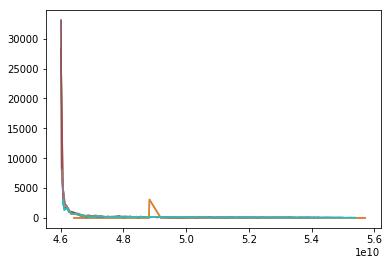

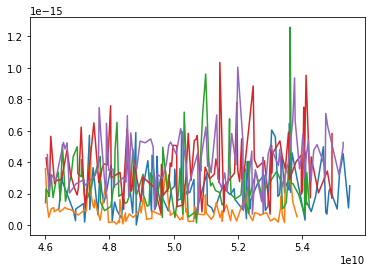

In [63]:
for m in range(M):
    plt.plot(np.real(freqs[m,:]), np.real(freqs[m,:])/(2*np.imag(freqs[m,:])))
    plt.plot(np.real(freqs[m,:]), Qs[m,:])
plt.show()
for m in range(M):
    plt.plot(np.real(freqs[m,:-1]), E_els[m,:])
plt.show()

In [3]:
theta = 54.7/180*np.pi
Ry = np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta),0,np.cos(theta)]])

phi = 45/180*np.pi
Rz = np.array([[np.cos(phi),-np.sin(phi),0],[np.sin(phi),np.cos(phi),0],[0,0,1]])
T = np.dot(Rz, Ry)
TT = T.T

In [17]:
R = []
Z = []
eRR = []
eRPHI = []
eRZ = []
ePHIPHI = []
ePHIZ = []
eZZ = []
with open('Data\Electron-Phonon-Engineering\Tensor Components.txt') as f:
    lines = f.readlines()
    for line in lines[9:]:
        line = line.split(';') 
        R.append(float(line[0]))
        Z.append(float(line[1]))
        
        data = np.array([np.complex(entr.replace('i','j')) for entr in line[2:]])
        data = data.reshape(M,int(len(data)/(6*M)),6)
        
        eRR.append(data[:,:,0])
        eRPHI.append(data[:,:,1])
        eRZ.append(data[:,:,2])
        ePHIPHI.append(data[:,:,3])
        ePHIZ.append(data[:,:,4])
        eZZ.append(data[:,:,5])

R = np.array(R).squeeze()
Z = np.array(Z).squeeze()
eRR = np.array(eRR).squeeze()
eRPHI = np.array(eRPHI).squeeze()
eRZ = np.array(eRZ).squeeze()
ePHIPHI = np.array(ePHIPHI).squeeze()
ePHIZ = np.array(ePHIZ).squeeze()
eZZ = np.array(eZZ).squeeze()
e = np.vstack((eRR,eRPHI,eRZ,np.conj(eRPHI),ePHIPHI,ePHIZ, np.conj(eRZ), np.conj(ePHIZ), eZZ))
e = e.reshape(3, 3,*eRR.shape)

ValueError: could not convert string to float: '% R'

In [184]:
triangles = tri.Triangulation(R, Z)
plt.tricontourf(triangles, T.T@np.real(eRR[:,0,0])@T)
plt.colorbar()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 185 is different from 3)